In [1]:
import tensorflow as tf
import numpy as np
from tf_powersfa import *

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
n_out = 3

In [3]:
batch_size = 1000
N = 1000

encoding_x = tf.placeholder("float", [N,3])

Wx  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_out]))
b0   = tf.Variable(tf.constant(0.1,shape=[n_out]))

dense0 = tf.matmul(encoding_x, Wx) + b0
dense = alt_power_whitening(dense0, 3, 50)[0]

In [4]:
n_hidden = 32

a, b, c = tf.split(dense, 3, axis=1)


In [5]:
x = tf.concat([b, c], axis=1)
y = a
range_bs = list(range(N))
permuted_bs = list(np.random.permutation(range_bs))
sd_indices =  tf.constant([permuted_bs])
sd_indices   = tf.transpose(sd_indices)
shape        = tf.constant([batch_size,1])
y_    = tf.scatter_nd(sd_indices, y, tf.shape(y))

h_join = tf.concat([y, x], axis=1)
h_marg = tf.concat([y_, x], axis=1)

Wx1  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b1   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx2  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b2   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx3  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b3   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx4  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b4   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx5  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b5   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx6  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b6   = tf.Variable(tf.constant(0.1,shape=[1]))

dense1_joint = tf.nn.leaky_relu(tf.matmul(h_join, Wx1) + b1)
dense2_joint = tf.nn.leaky_relu(tf.matmul(dense1_joint, Wx2) + b2)
dense3_joint = tf.nn.leaky_relu(tf.matmul(dense2_joint, Wx3) + b3)
dense4_joint = tf.nn.leaky_relu(tf.matmul(dense3_joint, Wx4) + b4)
dense5_joint = tf.nn.leaky_relu(tf.matmul(dense4_joint, Wx5) + b5)
dense6_joint = tf.matmul(dense5_joint, Wx6) + b6


dense1_marg = tf.nn.leaky_relu(tf.matmul(h_marg, Wx1) + b1)
dense2_marg = tf.nn.leaky_relu(tf.matmul(dense1_marg, Wx2) + b2)
dense3_marg = tf.nn.leaky_relu(tf.matmul(dense2_marg, Wx3) + b3)
dense4_marg = tf.nn.leaky_relu(tf.matmul(dense3_marg, Wx4) + b4)
dense5_marg = tf.nn.leaky_relu(tf.matmul(dense4_marg, Wx5) + b5)
dense6_marg = tf.matmul(dense5_joint, Wx6) + b6


loss1 = tf.reduce_mean(dense6_joint)-tf.log(tf.reduce_mean(tf.exp(dense6_marg)))


In [6]:
x2 = tf.concat([a, c], axis=1)
y2 = b
range_bs2 = list(range(N))
permuted_bs2 = list(np.random.permutation(range_bs2))
sd_indices2 =  tf.constant([permuted_bs2])
sd_indices2   = tf.transpose(sd_indices2)
y_2    = tf.scatter_nd(sd_indices2, y2, tf.shape(y2))

h_join2 = tf.concat([y2, x2], axis=1)
h_marg2 = tf.concat([y_2, x2], axis=1)

Wx12  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b12   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx22  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b22   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx32  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b32   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx42  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b42   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx52  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b52   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx62  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b62   = tf.Variable(tf.constant(0.1,shape=[1]))

dense1_joint2 = tf.nn.leaky_relu(tf.matmul(h_join2, Wx12) + b12)
dense2_joint2 = tf.nn.leaky_relu(tf.matmul(dense1_joint2, Wx22) + b22)
dense3_joint2 = tf.nn.leaky_relu(tf.matmul(dense2_joint2, Wx32) + b32)
dense4_joint2 = tf.nn.leaky_relu(tf.matmul(dense3_joint2, Wx42) + b42)
dense5_joint2 = tf.nn.leaky_relu(tf.matmul(dense4_joint2, Wx52) + b52)
dense6_joint2 = tf.matmul(dense5_joint2, Wx62) + b62


dense1_marg2 = tf.nn.leaky_relu(tf.matmul(h_marg2, Wx12) + b12)
dense2_marg2 = tf.nn.leaky_relu(tf.matmul(dense1_marg2, Wx22) + b22)
dense3_marg2 = tf.nn.leaky_relu(tf.matmul(dense2_marg2, Wx32) + b32)
dense4_marg2 = tf.nn.leaky_relu(tf.matmul(dense3_marg2, Wx42) + b42)
dense5_marg2 = tf.nn.leaky_relu(tf.matmul(dense4_marg2, Wx52) + b52)
dense6_marg2 = tf.matmul(dense5_marg2, Wx62) + b62


loss2 = tf.reduce_mean(dense6_joint2)-tf.log(tf.reduce_mean(tf.exp(dense6_marg2)))


In [7]:
x3 = tf.concat([b, a], axis=1)
y3 = c
range_bs3 = list(range(N))
permuted_bs3 = list(np.random.permutation(range_bs3))
sd_indices3 =  tf.constant([permuted_bs3])
sd_indices3   = tf.transpose(sd_indices3)
y_3    = tf.scatter_nd(sd_indices3, y3, tf.shape(y3))

h_join3 = tf.concat([y3, x3], axis=1)
h_marg3 = tf.concat([y_3, x3], axis=1)

Wx13  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b13   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx23  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b23   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx33  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b33   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx43  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b43   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx53  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b53   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx63  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b63   = tf.Variable(tf.constant(0.1,shape=[1]))

dense1_joint3 = tf.nn.leaky_relu(tf.matmul(h_join3, Wx13) + b13)
dense2_joint3 = tf.nn.leaky_relu(tf.matmul(dense1_joint3, Wx23) + b23)
dense3_joint3 = tf.nn.leaky_relu(tf.matmul(dense2_joint3, Wx33) + b33)
dense4_joint3 = tf.nn.leaky_relu(tf.matmul(dense3_joint3, Wx43) + b43)
dense5_joint3 = tf.nn.leaky_relu(tf.matmul(dense4_joint3, Wx53) + b53)
dense6_joint3 = tf.matmul(dense5_joint3, Wx63) + b63


dense1_marg3 = tf.nn.leaky_relu(tf.matmul(h_marg3, Wx13) + b13)
dense2_marg3 = tf.nn.leaky_relu(tf.matmul(dense1_marg3, Wx23) + b23)
dense3_marg3 = tf.nn.leaky_relu(tf.matmul(dense2_marg3, Wx33) + b33)
dense4_marg3 = tf.nn.leaky_relu(tf.matmul(dense3_marg3, Wx43) + b43)
dense5_marg3 = tf.nn.leaky_relu(tf.matmul(dense4_marg3, Wx53) + b53)
dense6_marg3 = tf.matmul(dense5_marg3, Wx63) + b63


loss3 = tf.reduce_mean(dense6_joint3)-tf.log(tf.reduce_mean(tf.exp(dense6_marg3)))


In [8]:
estimator_loss = -(loss1+loss2+loss3)
encoder_loss1 = loss2+loss3
encoder_loss2 = loss1+loss3
encoder_loss3 = loss1+loss2
total_encoder_loss = loss1+loss2+loss3
encoder_lr = 0.005

train_encoder1   = tf.train.AdamOptimizer(encoder_lr).minimize(encoder_loss1, var_list=[Wx, b0])
train_encoder2   = tf.train.AdamOptimizer(encoder_lr).minimize(encoder_loss2, var_list=[Wx, b0])
train_encoder3   = tf.train.AdamOptimizer(encoder_lr).minimize(encoder_loss3, var_list=[Wx, b0])

train_encoders = tf.train.AdamOptimizer(encoder_lr).minimize(total_encoder_loss, var_list=[Wx, b0])
estimator_vars = [Wx1,  b1,  Wx2,  b2,  Wx3,  b3,  Wx4,  b4,  Wx5,  b5,  Wx6,  b6,
                  Wx12, b12, Wx22, b22, Wx32, b32, Wx42, b42, Wx52, b52, Wx62, b62,
                  Wx13, b13, Wx23, b23, Wx33, b33, Wx43, b43, Wx53, b53, Wx63, b63]

regularizer = tf.contrib.layers.l2_regularizer(scale=0.001)

for var in estimator_vars:
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, var)
reg_variables = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
reg_term = tf.contrib.layers.apply_regularization(regularizer, reg_variables)
estimator_loss += reg_term
train_estimators =  tf.contrib.opt.NadamOptimizer(0.005).minimize(estimator_loss, var_list=estimator_vars) 

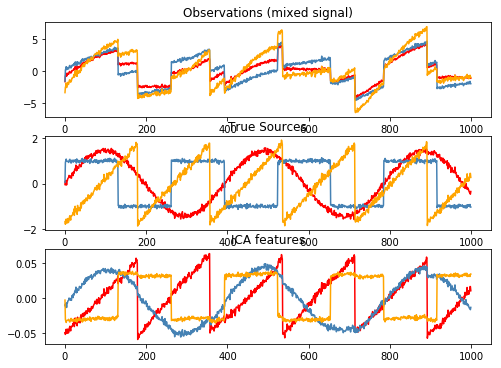

In [9]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from scipy import signal

time = np.linspace(0, 8, batch_size)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(1.4 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.05 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1  , 1, 1],
              [0.5, 2, 1.0],
              [1.5, 1.0, 2.0]])  # Mixing matrixX = np.dot(S, A.T)  # Generate observations
X = np.dot(S, A.T)  # Generate observations

# Solve the task with FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals


models = [X, S, S_]
names = ['Observations (mixed signal)', 'True Sources', 'ICA features']
colors = ['red', 'steelblue', "orange"]
plt.figure(figsize=(8, 8))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
plt.show()

In [10]:
shuffled_x = np.array(X)


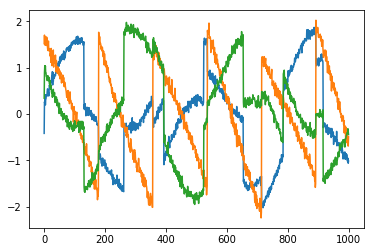

step: 0, loss1: -1.4e-05, loss2: -0.00017, loss3: -3.7e-05, all_loss: -0.00022


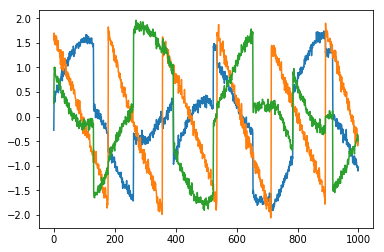

step: 50, loss1: 1.5e-06, loss2: 0.3, loss3: 1.2, all_loss: 1.5
step: 100, loss1: -6.4e-07, loss2: 0.31, loss3: 1.4, all_loss: 1.7
step: 150, loss1: -1.3e-06, loss2: -0.033, loss3: 0.62, all_loss: 0.59
step: 200, loss1: 1e-06, loss2: 0.41, loss3: 0.44, all_loss: 0.84


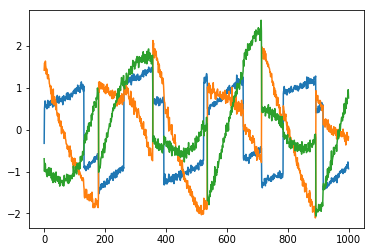

step: 250, loss1: -1.4e-06, loss2: 0.58, loss3: 1.4, all_loss: 2.0
step: 300, loss1: 1.2e-06, loss2: 0.56, loss3: 0.56, all_loss: 1.1
step: 350, loss1: 1.2e-06, loss2: 0.84, loss3: 0.22, all_loss: 1.1
step: 400, loss1: 1.5e-06, loss2: 0.3, loss3: 0.91, all_loss: 1.2


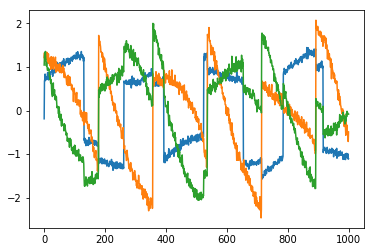

step: 450, loss1: 1.4e-06, loss2: 0.26, loss3: -0.32, all_loss: -0.052
step: 500, loss1: 1.8e-06, loss2: 0.6, loss3: 0.74, all_loss: 1.3
step: 550, loss1: -1.4e-06, loss2: 0.35, loss3: 1.2, all_loss: 1.6
step: 600, loss1: 1.1e-06, loss2: 0.61, loss3: 1.1, all_loss: 1.7


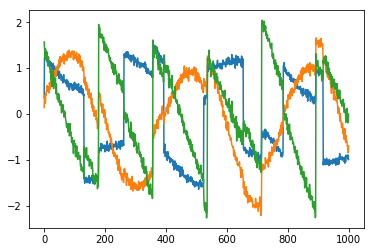

step: 650, loss1: 1.3e-06, loss2: 0.89, loss3: 0.28, all_loss: 1.2
step: 700, loss1: -1.8e-06, loss2: 0.85, loss3: 0.68, all_loss: 1.5
step: 750, loss1: 6.9e-07, loss2: 0.12, loss3: -0.0079, all_loss: 0.11
step: 800, loss1: 1.7e-08, loss2: 0.43, loss3: 0.011, all_loss: 0.44


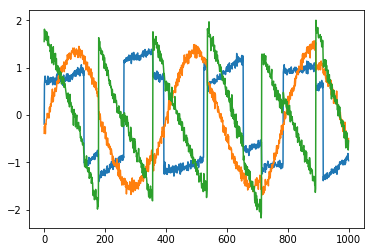

step: 850, loss1: -8.1e-07, loss2: 0.54, loss3: 0.053, all_loss: 0.6
step: 900, loss1: -9.8e-07, loss2: 0.3, loss3: 0.65, all_loss: 0.95
step: 950, loss1: -1e-06, loss2: 0.38, loss3: 0.67, all_loss: 1.0
step: 1000, loss1: 8.6e-07, loss2: 0.5, loss3: 0.17, all_loss: 0.66


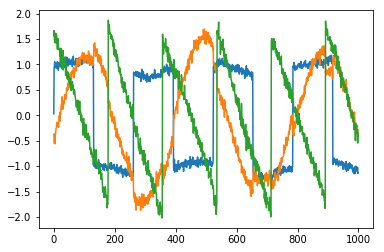

step: 1050, loss1: -1e-06, loss2: 0.6, loss3: 0.61, all_loss: 1.2
step: 1100, loss1: -8e-08, loss2: 0.6, loss3: 0.82, all_loss: 1.4
step: 1150, loss1: 2.9e-08, loss2: 0.67, loss3: 0.77, all_loss: 1.4
step: 1200, loss1: 1.8e-06, loss2: 0.57, loss3: 0.34, all_loss: 0.91


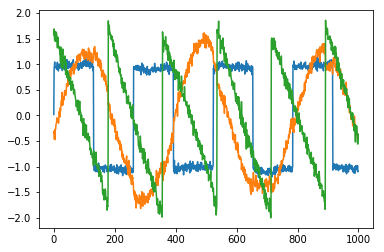

step: 1250, loss1: 1.1e-06, loss2: 0.49, loss3: 0.65, all_loss: 1.1
step: 1300, loss1: 7.3e-07, loss2: 0.5, loss3: 0.73, all_loss: 1.2
step: 1350, loss1: 1.4e-06, loss2: -0.091, loss3: 0.36, all_loss: 0.27
step: 1400, loss1: 1.6e-06, loss2: 0.51, loss3: 0.67, all_loss: 1.2


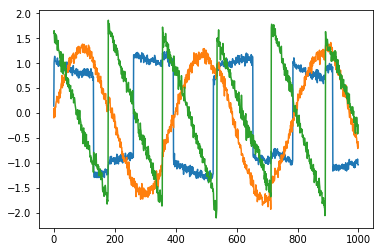

step: 1450, loss1: 1.2e-06, loss2: -0.1, loss3: 0.37, all_loss: 0.27
step: 1500, loss1: 6.1e-07, loss2: 0.38, loss3: 0.55, all_loss: 0.93
step: 1550, loss1: 1.4e-06, loss2: 0.62, loss3: 0.56, all_loss: 1.2
step: 1600, loss1: -5.9e-07, loss2: 0.96, loss3: 0.45, all_loss: 1.4


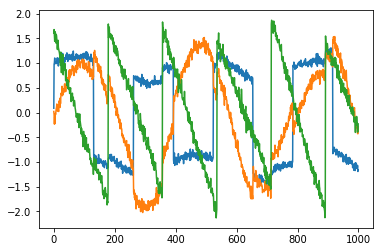

step: 1650, loss1: 1.1e-06, loss2: 0.98, loss3: 0.68, all_loss: 1.7
step: 1700, loss1: 6.3e-07, loss2: 0.92, loss3: 0.44, all_loss: 1.4
step: 1750, loss1: 8.1e-07, loss2: 0.63, loss3: 0.47, all_loss: 1.1
step: 1800, loss1: -1.2e-06, loss2: 0.71, loss3: 0.41, all_loss: 1.1


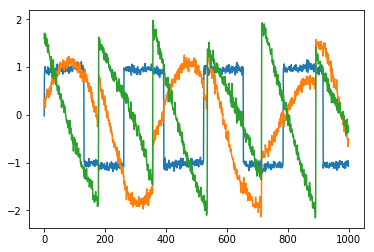

step: 1850, loss1: -8.6e-07, loss2: 0.72, loss3: 0.62, all_loss: 1.3
step: 1900, loss1: -1.3e-06, loss2: 1.0, loss3: 0.64, all_loss: 1.7
step: 1950, loss1: 2.6e-07, loss2: 1.0, loss3: 0.53, all_loss: 1.5
step: 2000, loss1: -1.7e-06, loss2: 1.2, loss3: 0.87, all_loss: 2.0


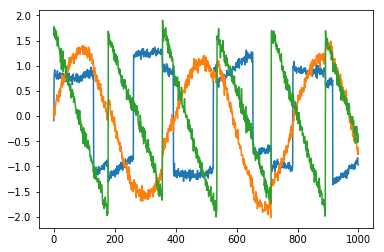

step: 2050, loss1: -1.2e-06, loss2: 1.3, loss3: 0.59, all_loss: 1.9
step: 2100, loss1: 6e-07, loss2: 1.2, loss3: 0.52, all_loss: 1.7
step: 2150, loss1: -6.7e-07, loss2: 0.79, loss3: 0.72, all_loss: 1.5
step: 2200, loss1: 1.3e-08, loss2: 0.39, loss3: 0.64, all_loss: 1.0


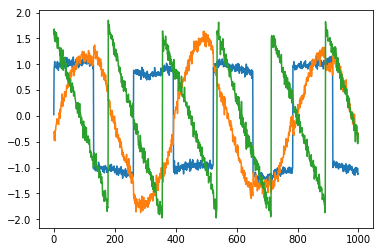

step: 2250, loss1: -1.7e-06, loss2: 0.91, loss3: 0.69, all_loss: 1.6
step: 2300, loss1: -5.1e-07, loss2: 1.3, loss3: 0.56, all_loss: 1.9
step: 2350, loss1: -9.6e-07, loss2: 1.5, loss3: 0.77, all_loss: 2.2
step: 2400, loss1: 7.5e-07, loss2: 1.2, loss3: -0.34, all_loss: 0.84


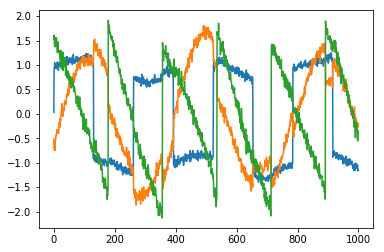

step: 2450, loss1: -9e-07, loss2: 0.44, loss3: 0.96, all_loss: 1.4
step: 2500, loss1: 8.1e-07, loss2: 0.41, loss3: 1.0, all_loss: 1.4
step: 2550, loss1: -8.1e-07, loss2: 0.71, loss3: 0.81, all_loss: 1.5
step: 2600, loss1: -2.9e-08, loss2: 1.1, loss3: 0.83, all_loss: 2.0


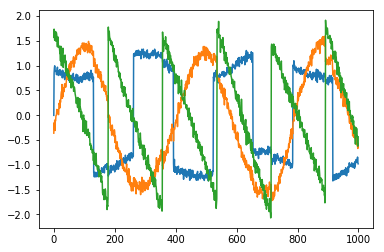

step: 2650, loss1: 5.5e-07, loss2: 1.1, loss3: 0.65, all_loss: 1.8
step: 2700, loss1: -6.7e-07, loss2: 1.2, loss3: 0.55, all_loss: 1.8
step: 2750, loss1: -1.1e-06, loss2: 0.81, loss3: 0.63, all_loss: 1.4
step: 2800, loss1: 8.4e-07, loss2: 0.53, loss3: 0.59, all_loss: 1.1


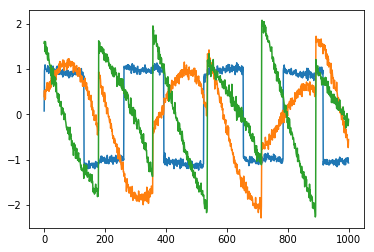

step: 2850, loss1: -9e-07, loss2: 0.46, loss3: 0.48, all_loss: 0.94
step: 2900, loss1: -9.6e-07, loss2: 0.73, loss3: 0.79, all_loss: 1.5
step: 2950, loss1: 7.5e-07, loss2: 0.89, loss3: 0.79, all_loss: 1.7
step: 3000, loss1: -5e-07, loss2: 0.57, loss3: 0.65, all_loss: 1.2


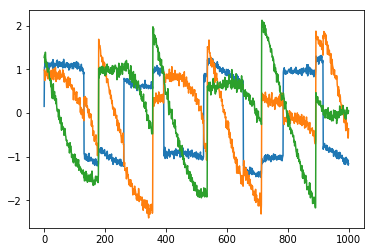

step: 3050, loss1: -1.8e-06, loss2: 1.4, loss3: 0.82, all_loss: 2.2
step: 3100, loss1: -1.9e-07, loss2: 0.69, loss3: 1.0, all_loss: 1.7
step: 3150, loss1: 1.7e-07, loss2: 0.99, loss3: 1.1, all_loss: 2.0
step: 3200, loss1: -8.2e-07, loss2: 0.76, loss3: 0.95, all_loss: 1.7


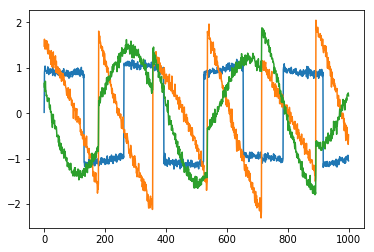

step: 3250, loss1: 1.1e-06, loss2: 0.92, loss3: 0.76, all_loss: 1.7
step: 3300, loss1: 1e-06, loss2: 0.9, loss3: 0.61, all_loss: 1.5
step: 3350, loss1: 6.9e-07, loss2: 1.0, loss3: 0.75, all_loss: 1.8
step: 3400, loss1: 6.6e-07, loss2: 0.89, loss3: 0.57, all_loss: 1.5


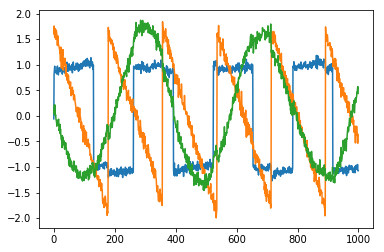

step: 3450, loss1: 1.4e-06, loss2: 0.66, loss3: 0.45, all_loss: 1.1
step: 3500, loss1: 1.4e-06, loss2: 0.8, loss3: 0.67, all_loss: 1.5
step: 3550, loss1: 6.4e-07, loss2: 0.96, loss3: 0.81, all_loss: 1.8
step: 3600, loss1: -1.4e-06, loss2: 1.2, loss3: 0.73, all_loss: 1.9


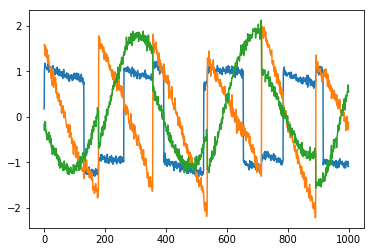

step: 3650, loss1: 8e-07, loss2: 0.77, loss3: 0.61, all_loss: 1.4
step: 3700, loss1: -1.3e-06, loss2: 0.96, loss3: 0.89, all_loss: 1.9
step: 3750, loss1: 1.4e-06, loss2: 0.83, loss3: 0.94, all_loss: 1.8
step: 3800, loss1: -1e-07, loss2: 1.2, loss3: 0.86, all_loss: 2.0


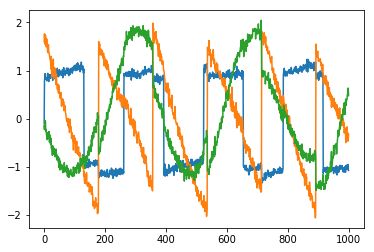

step: 3850, loss1: 4.1e-08, loss2: 1.3, loss3: 0.72, all_loss: 2.0
step: 3900, loss1: -1.4e-06, loss2: 1.0, loss3: 0.73, all_loss: 1.8
step: 3950, loss1: -3.3e-07, loss2: 1.1, loss3: 0.35, all_loss: 1.4
step: 4000, loss1: -8.4e-07, loss2: 0.76, loss3: 0.45, all_loss: 1.2


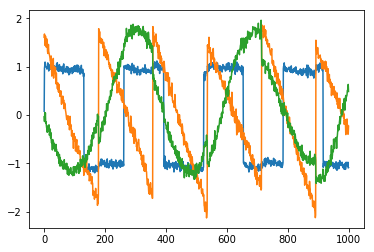

In [11]:
from random import shuffle
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    encoding = sess.run(dense, feed_dict={encoding_x:X})
    plt.plot(encoding)
    plt.show()
    for i in range(4001):
        np.random.shuffle(shuffled_x)
        current_loss1, current_loss2, current_loss3, _ = sess.run([loss1,
                                                    loss2, loss3, train_estimators], feed_dict={encoding_x:X})

        if i % 7   is 0: 
            _ = sess.run(train_encoders, feed_dict={encoding_x:X})

        if i % 50 is 0: 
            print("step: {}, loss1: {:.2}, loss2: {:.2}, loss3: {:.2}, all_loss: {:.2}".format(i,
                                current_loss1, current_loss2, current_loss3, current_loss1+current_loss2+current_loss3))
        if i % 200 is 0:
            encoding = sess.run(dense, feed_dict={encoding_x:X})
            plt.plot(encoding)
            plt.show()